# Chapter01 线性回归
## 2.1 最小二乘法
- $N$ 为正整数，对于给定的数对 $(x_{1},y_{1}),\cdots, (x_{N},y_{N})\in \mathbb{R}\times \mathbb{R}$，可以通过最小二乘法得出一个截距 $\beta_{0}$ 和斜率 $\beta_{1}$
- 最小二乘的**中心思想**
$$
\min L = \sum_{i=1}^{N}(y_{i} - \beta_{0} - \beta_{1}x_{i})^{2} = \Vert \boldsymbol{y} - \boldsymbol{X}\hat{\boldsymbol{\beta}} \Vert^{2}
$$

### 2.1.1 求法 
- 逐个求偏导
$$
\begin{array}{cc}
  \begin{cases}
    \displaystyle \frac{\partial{L}}{\partial{\beta_{0}}} =-2 \sum_{i=1}^{N}(y_{i} - \beta_{0} - \beta_{1}x_{i})= 0	\\
    \displaystyle \frac{\partial{L}}{\partial{\beta_{1}}} =-2 \sum_{i=1}^{N}x_{i}(y_{i} - \beta_{0} - \beta_{1}x_{i})= 0	\\
  \end{cases} 
  \\\\ \big\Downarrow \\\\
  \begin{cases}
    \displaystyle	\bar{y} - \beta_{0} - \beta_{1}\bar{x} = 0 & (1)\\
    \displaystyle	\sum_{i=1}^{N}x_{i}y_{i} - \beta_{0}\bar{x} - \beta_{1}\sum_{i=1}^{N}x_{i}^{2} = 0 & (2)\\
  \end{cases}\xrightarrow{(2)-\bar{x}(1)} \displaystyle \text{Cov}(x,y)-\beta_{1}D(x) =0
  \\\\ \big\Downarrow \\\\
  \begin{cases}
    \displaystyle	\hat{\beta}_{1} = \frac{\text{Cov}(x,y)}{D(x)} = \frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}\\
    \displaystyle	\hat{\beta}_{0} = \bar{y} - \hat{\beta}_{1}\bar{x}\\
  \end{cases}
\end{array}
$$

In [1]:
function min_sq(x::Array, y::Array)
    x_bar, y_bar = mean(x), mean(y)
    beta_1 = (x .- x_bar)' * (y .- y_bar) ./ norm(x .- x_bar)^2
    beta_0 = y_bar - beta_1 * x_bar
    return [beta_1, beta_0]'
end

min_sq (generic function with 1 method)

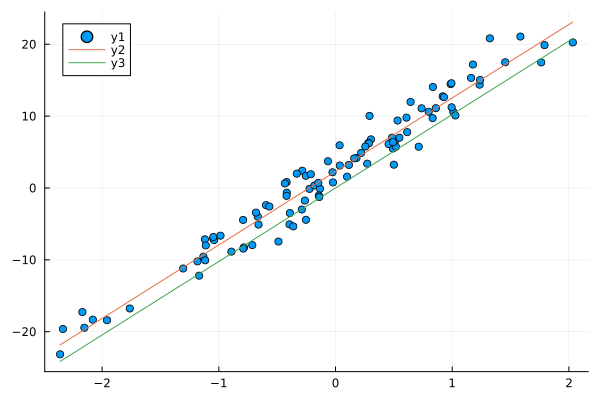

In [2]:
using Plots, Random, Statistics, LinearAlgebra

N = 100;
x0 = randn(N);
y0 = 10 .* x0 .+ 2randn(N) .+ 2 * ones(N)
x1 = x0 .- mean(x0) * ones(N);
y1 = y0 .- mean(y0) * ones(N);

f(x) = min_sq(x0, y0) * [x, 1]
f1(x) = min_sq(x1, y1) * [x, 1]
scatter(x0, y0)
plot!(x -> f(x))
plot!(x -> f1(x))

- 线性代数的解释（最小二乘法的线代思想）
    1. 求解方程组 $\boldsymbol{\beta}$ 为未知数
    $$
    \boldsymbol{X\beta} = \boldsymbol{y}
    $$
    2. 当该方程组无解时，需要寻找最优解使得
    $$
    \min L = \Vert \boldsymbol{y} - \boldsymbol{X\hat{\beta}}\Vert
    $$
    3. 当 $\boldsymbol{y} - \boldsymbol{X\hat{\beta}}$ 与 $\boldsymbol{X}$ 正交时取得最优解，既
    $$
    \boldsymbol{X}^{\text{T}}(\boldsymbol{y} - \boldsymbol{X \hat{\beta}}) = \boldsymbol{0}
    $$
    4. 解得
    $$
    \boldsymbol{\hat{\beta}} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{y}
    $$


In [3]:
function min_sq_matrix(X::Matrix, y::Array)
    return (X' * X)^(-1) * X' * y
end

min_sq_matrix (generic function with 1 method)

In [4]:
using Plots, Random, Statistics, LinearAlgebra
Random.seed!(1)

n = 100;
p = 2;
beta = [1, 2, 4];
x = randn(n, 2)
X = hcat(ones(n), x);
y = reduce(+, [beta[i] .* X[:, i] for i = 1:3])
inv(transpose(X) * X) * transpose(X) * y


3-element Vector{Float64}:
 1.0
 1.9999999999999996
 3.9999999999999987

## 2.2 $\boldsymbol{\hat{\beta}}$的分布
- 首先，我们有如下假设 $\boldsymbol{y}, \boldsymbol{\epsilon} \in \mathbb{R}^{N}, \boldsymbol{X}\sim \mathbb{R}^{N\times (p+1)}, \boldsymbol{\beta}\sim \mathbb{R}^{p+1}$
    $$
    \boldsymbol{y} = \boldsymbol{X\beta} + \boldsymbol{\epsilon}
    $$
    1. 其中的 $\boldsymbol{\beta}$ 是未知的，且与 $\boldsymbol{\hat{\beta}}$ 无关，$\boldsymbol{\hat{\beta}}$ 仅为通过最小二乘法估计所得的估计值
    2. $\epsilon_i$ 相互独立，且服从于正态分布 $\epsilon_i\sim \mathcal{N}(0,\sigma^2)$
    3. 故 $\epsilon_1,\cdots,\epsilon_N$ 的联合分布
    $$
    f(\boldsymbol{\epsilon}) = \prod_{i=1}^{N}f_{i}(\epsilon_{i}) = \frac{1}{(2\pi\sigma^{2})^{N/2}}\exp\left\{-\frac{\boldsymbol{\epsilon}^{\text{T}}\boldsymbol{\epsilon}}{2\sigma^{2}}\right\}
    $$
    4. 因此 $\boldsymbol{\epsilon}\sim \mathcal{N}(0, \sigma^{2}\boldsymbol{I})$ ($\boldsymbol{I}$ 为 $N$ 阶单位矩阵 )
        - $E(\boldsymbol{\epsilon\epsilon}^{\text{T}}) = \sigma^{2}\boldsymbol{I}$ 
    5. 将 $\boldsymbol{y} = \boldsymbol{X \beta} + \boldsymbol{\epsilon}$ 带入 $\boldsymbol{\hat{\beta}} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{y}$ 可得
    $$\begin{split}
    \boldsymbol{\hat{\beta}} & = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}(\boldsymbol{X\beta} + \boldsymbol{\epsilon}) \\
    & = \boldsymbol{\beta} + (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon}
    \end{split}$$
    6. 其中，可将 $(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}$ 视为常数，故可得 $\boldsymbol{\hat{\beta}}$ 的期望：
    $$
    E(\boldsymbol{\hat{\beta}}) = \boldsymbol{\beta} + \boldsymbol{0} = \boldsymbol{\beta}
    $$
    7. $\boldsymbol{\hat{\beta}}$ 的协方差矩阵
    $$
    \begin{split}
    E& 
    \left[
    \begin{matrix}
      (\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0})^{2} & (\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0})(\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1}) &\cdots &(\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0})(\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})\\
    (\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1})(\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0}) & (\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1})^{2} & \cdots & (\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1})(\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})\\
    \vdots &\vdots &\ddots & \vdots \\
    (\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})(\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0}) & (\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})(\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1}) & \cdots & (\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})^{2}\\
    \end{matrix}
    \right]\\
    &= E(\boldsymbol{\hat{\beta}}-\boldsymbol{\beta})(\boldsymbol{\hat{\beta}-\boldsymbol{\beta}})^{\text{T}} = E(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon}\{(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon}\}^{\text{T}} \\
    & \xlongequal{E (\boldsymbol{\epsilon\epsilon}^{\text{T}}) = \sigma^{2}\boldsymbol{I}} \sigma^{2}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}
    \end{split}
    $$
    8. 因此
    $$
    \boldsymbol{\hat{\beta}} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^{2}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1})
    $$
    
    
    
    


## 2.3 $\text{RSS}$值的分布 
- **Hat Matrix**
    - **定义** $\boldsymbol{H} \coloneqq \boldsymbol{X}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\in \mathbb{R}^{N\times N}$ 
    - **性质** 
        1. $\boldsymbol{H}^{2} = \boldsymbol{H}$
        2. $(\boldsymbol{I} -\boldsymbol{H})^{2} = \boldsymbol{I} - \boldsymbol{H}$
        3. $\boldsymbol{HX} = \boldsymbol{X}$
- 由 $\boldsymbol{\hat{y}} = \boldsymbol{X \hat{\beta}}$ 和 $\boldsymbol{\hat{\beta}} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{y}$，可得 $\boldsymbol{\hat{y}} = \boldsymbol{Hy}$ 故可得
  $$
  \begin{split}
  \boldsymbol{y} - \boldsymbol{\hat{y}} &= (\boldsymbol{I} - \boldsymbol{H})\boldsymbol{y} = (\boldsymbol{I} - \boldsymbol{H})(\boldsymbol{X\beta} +\boldsymbol{\epsilon})\\
  &= (\boldsymbol{X} - \boldsymbol{HX})\boldsymbol{\beta} + (\boldsymbol{I} - \boldsymbol{H}) \boldsymbol{\epsilon} \\
  & = (\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}
  \end{split}
  $$
- $\text{RSS}$的定义
  $$
  \begin{split}
    \text{RSS} &\coloneqq \Vert \boldsymbol{y} - \boldsymbol{\hat{y}}\Vert^{2}  = \{(\boldsymbol{I}-\boldsymbol{H})\boldsymbol{\epsilon}\}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}  \\
    & =\boldsymbol{\epsilon}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})^{2}\boldsymbol{\epsilon} = \boldsymbol{\epsilon}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}
  \end{split}
  $$
- **命题 13**: $\boldsymbol{H}$ 和 $\boldsymbol{I}- \boldsymbol{H}$ 的特征值仅可能为 $0$ 或 $1$，且 $1$ 和 $0$ 分别为 $\boldsymbol{H}$ 和 $\boldsymbol{I} - \boldsymbol{H}$ 的 $p+1$ 重特征值，因此 $0$ 和 $1$ 分别为$\boldsymbol{H}$ 和 $\boldsymbol{I} - \boldsymbol{H}$ 的 $N-p-1$ 重特征值
- 由于 $\boldsymbol{H}$ 和 $\boldsymbol{I} - \boldsymbol{H}$ 为实对称矩阵，故存在正交阵 $\boldsymbol{P}\in \mathbb{R}^{N\times N}$ 可将二者对角化
  $$
  \boldsymbol{P}(\boldsymbol{I} - \boldsymbol{H}) \boldsymbol{P}^{\text{T}} = \text{diag}(
  \underbrace{1,\cdots,1}_{N-p-1},\underbrace{0,\cdots,0}_{p+1})
  $$
- 定义 $\boldsymbol{v} \coloneqq \boldsymbol{P\epsilon}\in \mathbb{R}^{N}\Rightarrow \boldsymbol{\epsilon} = \boldsymbol{P}^{\text{T}}\boldsymbol{v}$ 可得
    $$
    \begin{split}
    \text{RSS} &= \boldsymbol{\epsilon}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon} = (\boldsymbol{P}^{\text{T}}\boldsymbol{v})^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{P}^{\text{T}}\boldsymbol{v}\\
    &=\boldsymbol{v}^{\text{T}}\boldsymbol{P}^{}(\boldsymbol{I-\boldsymbol{H}})\boldsymbol{P}^{\text{T}}\boldsymbol{v} \\
    & = 
    \begin{bmatrix}
      v_{1} & \cdots& v_{N-p-1} & v_{N-p} & \cdots & v_{n}
    \end{bmatrix}
    \begin{bmatrix}
      1 & 0 & \cdots & \cdots & \cdots & 0 \\
      0 & \ddots & 0 & \cdots & \cdots & \vdots \\
      \vdots & 0 & 1 & 0 & \cdots & 0 \\
      \vdots & \vdots & 0 & 0 & \cdots & \vdots \\
      \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
      0 & \cdots & 0 & \cdots & \cdots & 0 \\
    \end{bmatrix}
    \begin{bmatrix}
      v_{1} \\ \vdots\\ v_{N-p-1} \\ v_{N-p} \\ \vdots \\ v_{n}
    \end{bmatrix} \\
    & = \sum_{i=1}^{N-p-1} v_{i}^{2}
    \end{split}
    $$
  - $\boldsymbol{v} = \boldsymbol{P\epsilon}\Rightarrow E(\boldsymbol{v}) = E(\boldsymbol{P\epsilon}) = 0$
  - $E(\boldsymbol{vv}^{\text{T}}) = E(\boldsymbol{P\epsilon}(\boldsymbol{P\epsilon})^{\text{T}}) =  \boldsymbol{P}E(\boldsymbol{\epsilon\epsilon}^{\text{T}})\boldsymbol{P^{\text{T}}} = \sigma^{2}\boldsymbol{\tilde{I}}, \quad\boldsymbol{\tilde{I}}=\text{diag}(\underbrace{1,\cdots,1}_{N-p-1},\underbrace{0,\cdots,0}_{p+1})$
  - 因此，可得 $\text{RSS}/\sigma^{2}$ 的分布
  $$
  \frac{\text{RSS}}{\sigma^{2}} \sim \chi^{2}_{N-p-1}
  $$

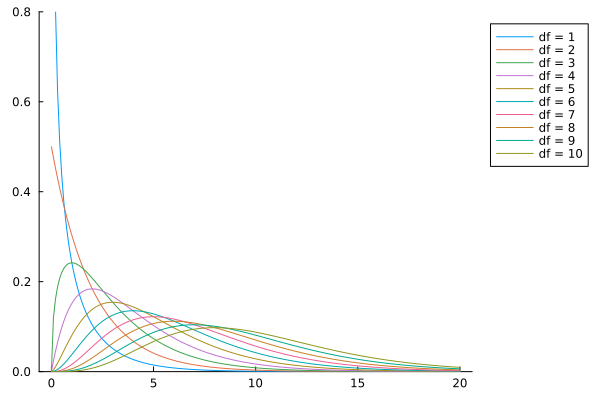

In [5]:
using Plots, Distributions
x = collect(0:0.1:20);

default(ylims=[0,0.8],grid=:none, legend=:outertopright)
fig = plot()
for i in 1:10
    plot!(x, pdf.(Chisq(i),x),label="df = $i")
end
plot(fig)